In [1]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from flask import Flask, render_template, redirect
from flask_pymongo import PyMongo
import pymongo
from bs4 import BeautifulSoup as bs
import requests
from splinter import Browser
import time 
from IPython import get_ipython
import nbconvert

In [2]:
#Import CSVs of individual WR statistics for years 2009-2019 (source: airyards.com)

ay_2019 = pd.read_csv("../Resources/2019.csv")
ay_2018 = pd.read_csv("../Resources/2018.csv")
ay_2017 = pd.read_csv("../Resources/2017.csv")
ay_2016 = pd.read_csv("../Resources/2016.csv")
ay_2015 = pd.read_csv("../Resources/2015.csv")
ay_2014 = pd.read_csv("../Resources/2014.csv")
ay_2013 = pd.read_csv("../Resources/2013.csv")
ay_2012 = pd.read_csv("../Resources/2012.csv")
ay_2011 = pd.read_csv("../Resources/2011.csv")
ay_2010 = pd.read_csv("../Resources/2010.csv")
ay_2009 = pd.read_csv("../Resources/2009.csv")


# create list of objects for read results
df_list = [ay_2009, ay_2010, ay_2011, ay_2012, ay_2013, ay_2014, ay_2015, ay_2016, ay_2017, ay_2018, ay_2019]


df_list

[    Unnamed: 0            full_name position team  targets  rec  rec_yards  \
 0            1     Larry Fitzgerald       WR  ARI      154   97       1092   
 1            2     Brandon Marshall       WR  DEN      154  101       1120   
 2            3       DeSean Jackson       WR  PHI      118   63       1167   
 3            4         Mike Wallace       WR  PIT       72   39        756   
 4            5        Jeremy Maclin       WR  PHI       90   55        762   
 5            6        Pierre Garcon       WR  IND       92   47        765   
 6            7          Kenny Britt       WR  TEN       75   42        701   
 7            8     Michael Crabtree       WR   SF       86   48        625   
 8            9             Ted Ginn       WR  MIA       78   38        454   
 9           10       Danny Amendola       WR  STL       63   43        326   
 10          11       Julian Edelman       WR   NE       54   37        359   
 11          12         Jordy Nelson       WR   GB  

In [3]:
#Add Year column

year = 2009

for df in df_list:
    
    df["Year"] = year
    
    year += 1

df_list[10]

,Unnamed: 0,full_name,position,team,targets,rec,rec_yards,air_yards,yac,td,adot,racr,ms_air,tgt_share,wopr,ppr,Year
0,1,Michael Thomas,WR,NO,185,149,1725,1488,583,9,8.0,1.16,0.40,0.32,0.75,374.6,2019
1,2,Chris Godwin,WR,TB,121,86,1333,1301,577,9,10.8,1.02,0.23,0.22,0.49,274.1,2019
2,3,Julio Jones,WR,ATL,157,99,1394,1913,364,6,12.2,0.73,0.37,0.25,0.63,274.1,2019
3,4,Cooper Kupp,WR,LA,134,94,1161,1007,538,10,7.5,1.15,0.21,0.21,0.46,270.5,2019
4,5,DeAndre Hopkins,WR,HOU,150,104,1165,1580,387,7,10.5,0.74,0.34,0.30,0.69,264.3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,Juwann Winfree,WR,DEN,0,0,0,0,0,0,NaN,NaN,0.00,0.00,0.00,0.0,2019
199,200,Mack Hollins,WR,MIA,1,0,0,33,0,0,33.0,0.00,0.03,0.01,0.03,0.0,2019
200,201,Matthew Slater,WR,NE,0,0,0,0,0,0,NaN,NaN,0.00,0.00,0.00,0.0,2019
201,202,Taywan Taylor,WR,CLE,1,0,0,33,0,0,33.0,0.00,0.05,0.02,0.06,0.0,2019


In [4]:
merged_df = pd.concat(df_list)


In [5]:
merged_df

,Unnamed: 0,full_name,position,team,targets,rec,rec_yards,air_yards,yac,td,adot,racr,ms_air,tgt_share,wopr,ppr,Year
0,1,Larry Fitzgerald,WR,ARI,154,97,1092,1779,312,13,11.6,0.61,0.39,0.26,0.66,284.2,2009
1,2,Brandon Marshall,WR,DEN,154,101,1120,1367,515,10,8.9,0.82,0.40,0.31,0.74,276.9,2009
2,3,DeSean Jackson,WR,PHI,118,63,1167,1599,404,9,13.6,0.73,0.36,0.22,0.59,253.4,2009
3,4,Mike Wallace,WR,PIT,72,39,756,1359,143,6,18.9,0.56,0.27,0.13,0.39,155.4,2009
4,5,Jeremy Maclin,WR,PHI,90,55,762,1057,241,4,11.7,0.72,0.27,0.20,0.48,154.5,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,Juwann Winfree,WR,DEN,0,0,0,0,0,0,NaN,NaN,0.00,0.00,0.00,0.0,2019
199,200,Mack Hollins,WR,MIA,1,0,0,33,0,0,33.0,0.00,0.03,0.01,0.03,0.0,2019
200,201,Matthew Slater,WR,NE,0,0,0,0,0,0,NaN,NaN,0.00,0.00,0.00,0.0,2019
201,202,Taywan Taylor,WR,CLE,1,0,0,33,0,0,33.0,0.00,0.05,0.02,0.06,0.0,2019


In [6]:
# add prior year stats

merged_df = merged_df[['full_name', 'Year', 'targets', 'rec', 'rec_yards', 'air_yards', 'yac', 'td', 'adot', 'racr', 'ms_air',
                     'tgt_share', 'wopr', 'ppr']]

merged_df = merged_df.sort_values(by=['full_name', 'Year'], ascending=False)

merged_df.head(20)


,full_name,Year,targets,rec,rec_yards,air_yards,yac,td,adot,racr,ms_air,tgt_share,wopr,ppr
129,Zay Jones,2019,27,20,147,234,58,0,8.7,0.63,0.11,0.08,0.20,35.0
152,Zay Jones,2019,18,7,69,250,19,0,13.9,0.28,0.18,0.12,0.31,13.9
37,Zay Jones,2018,100,54,621,1256,133,6,12.6,0.49,0.25,0.21,0.48,152.1
78,Zay Jones,2017,74,27,316,994,63,2,13.4,0.32,0.27,0.17,0.44,70.6
53,Zach Pascal,2019,72,41,607,800,235,5,11.1,0.76,0.19,0.14,0.35,133.3
92,Zach Pascal,2018,44,26,272,470,71,2,10.7,0.58,0.11,0.08,0.19,66.2
73,Willie Snead,2019,46,31,339,409,126,5,8.9,0.83,0.11,0.10,0.23,95.1
44,Willie Snead,2018,95,62,649,775,276,1,8.2,0.84,0.17,0.18,0.39,134.2
121,Willie Snead,2017,16,8,92,107,32,0,6.7,0.86,0.07,0.06,0.14,17.2
33,Willie Snead,2016,104,72,895,783,387,4,7.5,1.14,0.18,0.17,0.38,185.5


In [7]:
merged_df['UAY'] = merged_df['air_yards'] - (merged_df['rec_yards'] - merged_df['yac'])

merged_df['Catch %'] = (merged_df['rec']/merged_df['targets']) * 100

merged_df['Yds/tgt'] = (merged_df['rec_yards']/merged_df['targets'])

merged_df['Yds/rec'] = (merged_df['rec_yards']/merged_df['rec'])

merged_df['AY/rec'] = (merged_df['air_yards']/merged_df['rec'])

merged_df['AY/tgt'] = (merged_df['air_yards']/merged_df['targets'])

merged_df['UAY/tgt'] = (merged_df['UAY']/merged_df['targets'])

merged_df['UAY/rec'] = (merged_df['UAY']/merged_df['rec'])

merged_df['YAC/tgt'] = (merged_df['yac']/merged_df['targets'])

merged_df['YAC/rec'] = (merged_df['yac']/merged_df['rec'])

merged_df.head(50)

,full_name,Year,targets,rec,rec_yards,air_yards,yac,td,adot,racr,...,UAY,Catch %,Yds/tgt,Yds/rec,AY/rec,AY/tgt,UAY/tgt,UAY/rec,YAC/tgt,YAC/rec
129,Zay Jones,2019,27,20,147,234,58,0,8.7,0.63,...,145,74.074074,5.444444,7.350000,11.700000,8.666667,5.370370,7.250000,2.148148,2.900000
152,Zay Jones,2019,18,7,69,250,19,0,13.9,0.28,...,200,38.888889,3.833333,9.857143,35.714286,13.888889,11.111111,28.571429,1.055556,2.714286
37,Zay Jones,2018,100,54,621,1256,133,6,12.6,0.49,...,768,54.000000,6.210000,11.500000,23.259259,12.560000,7.680000,14.222222,1.330000,2.462963
78,Zay Jones,2017,74,27,316,994,63,2,13.4,0.32,...,741,36.486486,4.270270,11.703704,36.814815,13.432432,10.013514,27.444444,0.851351,2.333333
53,Zach Pascal,2019,72,41,607,800,235,5,11.1,0.76,...,428,56.944444,8.430556,14.804878,19.512195,11.111111,5.944444,10.439024,3.263889,5.731707
92,Zach Pascal,2018,44,26,272,470,71,2,10.7,0.58,...,269,59.090909,6.181818,10.461538,18.076923,10.681818,6.113636,10.346154,1.613636,2.730769
73,Willie Snead,2019,46,31,339,409,126,5,8.9,0.83,...,196,67.391304,7.369565,10.935484,13.193548,8.891304,4.260870,6.322581,2.739130,4.064516
44,Willie Snead,2018,95,62,649,775,276,1,8.2,0.84,...,402,65.263158,6.831579,10.467742,12.500000,8.157895,4.231579,6.483871,2.905263,4.451613
121,Willie Snead,2017,16,8,92,107,32,0,6.7,0.86,...,47,50.000000,5.750000,11.500000,13.375000,6.687500,2.937500,5.875000,2.000000,4.000000
33,Willie Snead,2016,104,72,895,783,387,4,7.5,1.14,...,275,69.230769,8.605769,12.430556,10.875000,7.528846,2.644231,3.819444,3.721154,5.375000


In [8]:
for col in merged_df.columns: 
    print(col)

full_name
Year
targets
rec
rec_yards
air_yards
yac
td
adot
racr
ms_air
tgt_share
wopr
ppr
UAY
Catch %
Yds/tgt
Yds/rec
AY/rec
AY/tgt
UAY/tgt
UAY/rec
YAC/tgt
YAC/rec


In [9]:
name_list = []

name_list2 = []

# Current Year Lists

yearList = []
tgtList = []
recList = []
recYdsList = []
ayList = []
yacList = []
tdList = []
adotList = []
racrList = []
msAirList = []
tgtShareList = []
woprList = []
pprPointsList = []
uayList = []
catchRateList = []
yptList = []
yprList = []
ayPerRecList = []
ayPerTgtList = []
uayPerTgtList = []
uayPerRecList = []
yacPerTgtList = []
yacPerRecList = []


# Prior Years Lists (py = Prior Year)

py_ayList = []
py_tarList = []
py_recList = []
py_ydsList = []
py_yacList = []
py_tdList = []
py_adotList = []
py_racrList = []

py_msAirList = []
py_tgtShare = []
py_woprList = []
py_pprPointsList = []
py_uayList = []
py_catchRateList = []
py_yptList = []
py_yprList = []
py_ayPerRecList = []
py_ayPerTgtList = []
py_uayPerTgtList = []
py_uayPerRecList = []
py_yacPerTgtList = []
py_yacPerRecList = []

for i, row in merged_df.iterrows():
    
    name = row[0]
    year = row[1]
    tar = row[2]
    rec = row[3]
    yds = row[4]
    AY = row[5]
    yac = row[6]
    td = row[7]
    adot = row[19]
    racr = row[9]
    ms_air = row[10]
    tgt_share = row[11]
    wopr = row[12]
    ppr = row[13]
    UAY = row[14]
    catch_rate = row[15]
    ypt = row[16]
    ypr = row[17]
    ayrec = row[18]
    aytar = row[19]
    uaytar = row[20]
    uayrec = row[21]
    yactgt = row[22]
    yacrec = row[23]
    
    if name not in name_list:
        
        name_list.append(name)
        name_list2.append(name)
        yearList.append(year)
        
        tgtList.append(tar)
        recList.append(rec)
        recYdsList.append(yds)
        ayList.append(AY)
        yacList.append(yac)
        tdList.append(td)
        adotList.append(adot)
        racrList.append(racr)
        msAirList.append(ms_air)
        tgtShareList.append(tgt_share)
        woprList.append(wopr)
        pprPointsList.append(ppr)
        uayList.append(UAY)
        catchRateList.append(catch_rate)
        yptList.append(ypt)
        yprList.append(ypr)
        ayPerRecList.append(ayrec)
        ayPerTgtList.append(aytar)
        uayPerTgtList.append(uaytar)
        uayPerRecList.append(uayrec)
        yacPerTgtList.append(yactgt)
        yacPerRecList.append(yacrec)
        
        
        py_ayList.append(np.nan)
        py_tarList.append(np.nan)
        py_recList.append(np.nan)
        py_ydsList.append(np.nan)
        py_yacList.append(np.nan)
        py_tdList.append(np.nan)
        py_adotList.append(np.nan)
        py_racrList.append(np.nan)
        
        py_msAirList.append(np.nan)
        py_tgtShare.append(np.nan)
        py_woprList.append(np.nan)
        py_pprPointsList.append(np.nan)
        py_uayList.append(np.nan)
        py_catchRateList.append(np.nan)
        py_yptList.append(np.nan)
        py_yprList.append(np.nan)
        py_ayPerRecList.append(np.nan)
        py_ayPerTgtList.append(np.nan)
        py_uayPerTgtList.append(np.nan)
        py_uayPerRecList.append(np.nan)
        py_yacPerTgtList.append(np.nan)
        py_yacPerRecList.append(np.nan)
        
        
    else:
        
       
        name_list.append(name)
        name_list2.append(name)
        yearList.append(year)
        
        tgtList.append(tar)
        recList.append(rec)
        recYdsList.append(yds)
        ayList.append(AY)
        yacList.append(yac)
        tdList.append(td)
        adotList.append(adot)
        racrList.append(racr)
        msAirList.append(ms_air)
        tgtShareList.append(tgt_share)
        woprList.append(wopr)
        pprPointsList.append(ppr)
        uayList.append(UAY)
        catchRateList.append(catch_rate)
        yptList.append(ypt)
        yprList.append(ypr)
        ayPerRecList.append(ayrec)
        ayPerTgtList.append(aytar)
        uayPerTgtList.append(uaytar)
        uayPerRecList.append(uayrec)
        yacPerTgtList.append(yactgt)
        yacPerRecList.append(yacrec)
        
        
        py_ayList.append(AY)
        py_tarList.append(tar)
        py_recList.append(rec)
        py_ydsList.append(yds)
        py_yacList.append(yac)
        py_tdList.append(td)
        py_adotList.append(adot)
        py_racrList.append(racr)
        
        py_msAirList.append(ms_air)
        py_tgtShare.append(tgt_share)
        py_woprList.append(wopr)
        py_pprPointsList.append(ppr)
        py_uayList.append(UAY)
        py_catchRateList.append(catch_rate)
        py_yptList.append(ypt)
        py_yprList.append(ypr)
        py_ayPerRecList.append(ayrec)
        py_ayPerTgtList.append(aytar)
        py_uayPerTgtList.append(uaytar)
        py_uayPerRecList.append(uayrec)
        py_yacPerTgtList.append(yactgt)
        py_yacPerRecList.append(yacrec)

            

py_ayList.append(np.nan)
py_ayList.pop(0)
py_tarList.append(np.nan)
py_tarList.pop(0)
py_recList.append(np.nan)
py_recList.pop(0)
py_ydsList.append(np.nan)
py_ydsList.pop(0)
py_yacList.append(np.nan)
py_yacList.pop(0)
py_tdList.append(np.nan)
py_tdList.pop(0)
py_adotList.append(np.nan)
py_adotList.pop(0)
py_racrList.append(np.nan)
py_racrList.pop(0)

py_msAirList.append(np.nan)
py_msAirList.pop(0)
py_tgtShare.append(np.nan)
py_tgtShare.pop(0)
py_woprList.append(np.nan)
py_woprList.pop(0)
py_pprPointsList.append(np.nan)
py_pprPointsList.pop(0)
py_uayList.append(np.nan)
py_uayList.pop(0)
py_catchRateList.append(np.nan)
py_catchRateList.pop(0)
py_yptList.append(np.nan)
py_yptList.pop(0)
py_yprList.append(np.nan)
py_yprList.pop(0)
py_ayPerRecList.append(np.nan)
py_ayPerRecList.pop(0)
py_ayPerTgtList.append(np.nan)
py_ayPerTgtList.pop(0)
py_uayPerTgtList.append(np.nan)
py_uayPerTgtList.pop(0)
py_uayPerRecList.append(np.nan)
py_uayPerRecList.pop(0)
py_yacPerTgtList.append(np.nan)
py_yacPerTgtList.pop(0)
py_yacPerRecList.append(np.nan)
py_yacPerRecList.pop(0)

print("success")

success


In [10]:
TestList = [name_list, name_list2, yearList, tgtList, recList, recYdsList, ayList, yacList, tdList, adotList, racrList,
            msAirList, tgtShareList, woprList, pprPointsList, uayList, catchRateList, yptList, yprList, ayPerRecList, 
            ayPerTgtList, uayPerTgtList, uayPerRecList, yacPerTgtList, yacPerRecList, py_ayList, py_tarList, py_recList, 
            py_ydsList, py_yacList, py_tdList, py_adotList, py_racrList, 
            
            py_msAirList, py_tgtShare, py_woprList, py_pprPointsList, py_uayList, py_catchRateList, py_yptList, py_yprList, 
            py_ayPerRecList, py_ayPerTgtList, py_uayPerTgtList, py_uayPerRecList, py_yacPerTgtList, py_yacPerRecList]


lengthList = []

for list in TestList:
    lengthList.append(len(list))
    
lengthList

[1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103,
 1103]

In [11]:
combinedDict = {"full_name": name_list2, 
                "Year": yearList, 
                "PPR_Points": pprPointsList, 
                "Targets": tgtList,
                "Rec": recList, 
                "Air_Yards": ayList, 
                "YAC": yacList, 
                "TDs": tdList, 
                "ADOT": adotList, 
                "RACR": racrList, 
                "MS_Air": msAirList, 
                "Tgt_Share": tgtShareList, 
                "WOPR": woprList, 
                "UAY": uayList, 
                "Catch_Rate": catchRateList,
                "Yds/Tgt": yptList, 
                "Yds/Rec": yprList, 
                "AY/Tgt": ayPerTgtList, 
                "AY/Rec": ayPerRecList, 
                "UAY/tgt": uayPerTgtList, 
                "UAY/Rec": uayPerRecList, 
                "YAC/Tgt": yacPerTgtList, 
                "YAC/Rec": yacPerRecList, 
                "PY_AY": py_ayList, 
                "PY_Tgt":py_tarList, 
                "PY_Rec": py_recList, 
                "PY_Yds": py_ydsList, 
                "PY_YAC": py_yacList, 
                "PY_TD": py_tdList, 
                "PY_aDOT": py_adotList,
                "PY_RACR": py_racrList, 
                "PY_MS_AY": py_msAirList, 
                "PY_TGT_Share": py_tgtShare, 
                "PY_WOPR": py_woprList, 
                "PY_PPR_Points": py_pprPointsList, 
                "PY_UAY": py_uayList, 
                "PY_Catch_Rate": py_catchRateList, 
                "PY_Yds/TGT": py_yptList, 
                "PY_YPR": py_yprList, 
                "PY_AY/Tgt": py_ayPerTgtList, 
                "PY_AY/Rec": py_ayPerRecList,
                "PY_UAY/Tgt": py_uayPerTgtList, 
                "PY_UAY/Rec": py_uayPerRecList, 
                "PY_YAC/Tgt": py_yacPerTgtList, 
                "PY_YAC/Rec": py_yacPerRecList}


combinedDF = pd.DataFrame(combinedDict)

#combinedDF.replace([np.inf, -np.inf], np.nan)

combinedDF.sort_values(by=['full_name', 'Year'], ascending=False)
combinedDF

,full_name,Year,PPR_Points,Targets,Rec,Air_Yards,YAC,TDs,ADOT,RACR,...,PY_UAY,PY_Catch_Rate,PY_Yds/TGT,PY_YPR,PY_AY/Tgt,PY_AY/Rec,PY_UAY/Tgt,PY_UAY/Rec,PY_YAC/Tgt,PY_YAC/Rec
0,Zay Jones,2019,35.0,27,20,234,58,0,8.666667,0.63,...,200.0,38.888889,3.833333,9.857143,13.888889,35.714286,11.111111,28.571429,1.055556,2.714286
1,Zay Jones,2019,13.9,18,7,250,19,0,13.888889,0.28,...,768.0,54.000000,6.210000,11.500000,12.560000,23.259259,7.680000,14.222222,1.330000,2.462963
2,Zay Jones,2018,152.1,100,54,1256,133,6,12.560000,0.49,...,741.0,36.486486,4.270270,11.703704,13.432432,36.814815,10.013514,27.444444,0.851351,2.333333
3,Zay Jones,2017,70.6,74,27,994,63,2,13.432432,0.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Zach Pascal,2019,133.3,72,41,800,235,5,11.111111,0.76,...,269.0,59.090909,6.181818,10.461538,10.681818,18.076923,6.113636,10.346154,1.613636,2.730769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,A.J. Green,2014,209.3,116,69,1511,309,6,13.025862,0.69,...,1196.0,55.056180,8.011236,14.551020,12.539326,22.775510,6.719101,12.204082,2.191011,3.979592
1099,A.J. Green,2013,306.6,178,98,2232,390,11,12.539326,0.64,...,1250.0,59.146341,8.231707,13.917526,13.652439,23.082474,7.621951,12.886598,2.201220,3.721649
1100,A.J. Green,2012,301.8,164,97,2239,361,11,13.652439,0.60,...,737.0,56.521739,9.191304,16.261538,13.182609,23.323077,6.408696,11.338462,2.417391,4.276923
1101,A.J. Green,2011,218.0,115,65,1516,278,7,13.182609,0.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
cleaned_df = combinedDF

print(cleaned_df.isnull().sum())
print(cleaned_df.dtypes)

full_name          0
Year               0
PPR_Points         0
Targets            0
Rec                0
Air_Yards          0
YAC                0
TDs                0
ADOT              35
RACR              36
MS_Air             0
Tgt_Share          0
WOPR               0
UAY                0
Catch_Rate        37
Yds/Tgt           37
Yds/Rec           59
AY/Tgt            35
AY/Rec            36
UAY/tgt           35
UAY/Rec           36
YAC/Tgt           37
YAC/Rec           59
PY_AY            302
PY_Tgt           302
PY_Rec           302
PY_Yds           302
PY_YAC           302
PY_TD            302
PY_aDOT          328
PY_RACR          329
PY_MS_AY         302
PY_TGT_Share     302
PY_WOPR          302
PY_PPR_Points    302
PY_UAY           302
PY_Catch_Rate    329
PY_Yds/TGT       329
PY_YPR           345
PY_AY/Tgt        328
PY_AY/Rec        329
PY_UAY/Tgt       328
PY_UAY/Rec       329
PY_YAC/Tgt       329
PY_YAC/Rec       345
dtype: int64
full_name         object
Year             

In [13]:
#cleaned_df['PY_Tgt'] = cleaned_df['PY_Tgt'].astype(float)

#print(cleaned_df['PY_Tgt'].dtypes)
cleaned_df['PY_Tgt']

0        18.0
1       100.0
2        74.0
3         NaN
4        44.0
        ...  
1098    178.0
1099    164.0
1100    115.0
1101      NaN
1102      NaN
Name: PY_Tgt, Length: 1103, dtype: float64

In [14]:
# cleaned_df = cleaned_df[['Year', 'targets', 'rec', 'Catch %', 'rec_yards', 'Yds/tgt', 'Yds/rec', 'air_yards', 'adot', 
#                          'AY/rec', 'yac', 'YAC/tgt', 'YAC/rec', 'UAY', 'UAY/tgt', 'UAY/rec', 'racr',
#                          'ms_air', 'tgt_share', 'wopr', 'ppr']]

# cleaned_df = cleaned_df.rename(columns={'targets':'Targets', 'rec':'Rec', 'Catch %': 'Catch_Rate',
#                                         'rec_yards':'Rec_Yds', 'air_yards':'Air_Yds',
#                                         'yac':'YAC', 'adot':'aDOT', 'racr':'RACR', 'ms_air':'MS_AY',
#                                         'tgt_share':'Tgt_Share','wopr':'WOPR', 'ppr': 'PPR_Points'})

cleaned_df.replace([np.inf, -np.inf], np.nan)

cleaned_df = cleaned_df.dropna()

#cleaned_df = cleaned_df.drop(cleaned_df[cleaned_df[cleaned_df['PY_Tgt']] < 0].index, inplace = True)

cleaned_df = cleaned_df.round(2)

cleaned_df.drop(cleaned_df.tail(1).index,inplace=True)

cleaned_df

,full_name,Year,PPR_Points,Targets,Rec,Air_Yards,YAC,TDs,ADOT,RACR,...,PY_UAY,PY_Catch_Rate,PY_Yds/TGT,PY_YPR,PY_AY/Tgt,PY_AY/Rec,PY_UAY/Tgt,PY_UAY/Rec,PY_YAC/Tgt,PY_YAC/Rec
0,Zay Jones,2019,35.0,27,20,234,58,0,8.67,0.63,...,200.0,38.89,3.83,9.86,13.89,35.71,11.11,28.57,1.06,2.71
1,Zay Jones,2019,13.9,18,7,250,19,0,13.89,0.28,...,768.0,54.00,6.21,11.50,12.56,23.26,7.68,14.22,1.33,2.46
2,Zay Jones,2018,152.1,100,54,1256,133,6,12.56,0.49,...,741.0,36.49,4.27,11.70,13.43,36.81,10.01,27.44,0.85,2.33
4,Zach Pascal,2019,133.3,72,41,800,235,5,11.11,0.76,...,269.0,59.09,6.18,10.46,10.68,18.08,6.11,10.35,1.61,2.73
6,Willie Snead,2019,95.1,46,31,409,126,5,8.89,0.83,...,402.0,65.26,6.83,10.47,8.16,12.50,4.23,6.48,2.91,4.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,A.J. Green,2017,230.8,143,75,1910,297,8,13.36,0.56,...,530.0,66.00,9.64,14.61,12.36,18.73,5.30,8.03,2.58,3.91
1096,A.J. Green,2016,186.4,100,66,1236,258,4,12.36,0.78,...,726.0,65.15,9.83,15.08,12.78,19.62,5.50,8.44,2.55,3.91
1097,A.J. Green,2015,275.7,132,86,1687,336,10,12.78,0.77,...,779.0,59.48,8.97,15.09,13.03,21.90,6.72,11.29,2.66,4.48
1098,A.J. Green,2014,209.3,116,69,1511,309,6,13.03,0.69,...,1196.0,55.06,8.01,14.55,12.54,22.78,6.72,12.20,2.19,3.98


In [15]:
###Clean DF for ML###

#cleaned_df = cleaned_df.drop(columns=["full_name"])

cleaned_df

,full_name,Year,PPR_Points,Targets,Rec,Air_Yards,YAC,TDs,ADOT,RACR,...,PY_UAY,PY_Catch_Rate,PY_Yds/TGT,PY_YPR,PY_AY/Tgt,PY_AY/Rec,PY_UAY/Tgt,PY_UAY/Rec,PY_YAC/Tgt,PY_YAC/Rec
0,Zay Jones,2019,35.0,27,20,234,58,0,8.67,0.63,...,200.0,38.89,3.83,9.86,13.89,35.71,11.11,28.57,1.06,2.71
1,Zay Jones,2019,13.9,18,7,250,19,0,13.89,0.28,...,768.0,54.00,6.21,11.50,12.56,23.26,7.68,14.22,1.33,2.46
2,Zay Jones,2018,152.1,100,54,1256,133,6,12.56,0.49,...,741.0,36.49,4.27,11.70,13.43,36.81,10.01,27.44,0.85,2.33
4,Zach Pascal,2019,133.3,72,41,800,235,5,11.11,0.76,...,269.0,59.09,6.18,10.46,10.68,18.08,6.11,10.35,1.61,2.73
6,Willie Snead,2019,95.1,46,31,409,126,5,8.89,0.83,...,402.0,65.26,6.83,10.47,8.16,12.50,4.23,6.48,2.91,4.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,A.J. Green,2017,230.8,143,75,1910,297,8,13.36,0.56,...,530.0,66.00,9.64,14.61,12.36,18.73,5.30,8.03,2.58,3.91
1096,A.J. Green,2016,186.4,100,66,1236,258,4,12.36,0.78,...,726.0,65.15,9.83,15.08,12.78,19.62,5.50,8.44,2.55,3.91
1097,A.J. Green,2015,275.7,132,86,1687,336,10,12.78,0.77,...,779.0,59.48,8.97,15.09,13.03,21.90,6.72,11.29,2.66,4.48
1098,A.J. Green,2014,209.3,116,69,1511,309,6,13.03,0.69,...,1196.0,55.06,8.01,14.55,12.54,22.78,6.72,12.20,2.19,3.98


In [16]:
#Confirm no nulls

cleaned_df.count()

full_name        742
Year             742
PPR_Points       742
Targets          742
Rec              742
Air_Yards        742
YAC              742
TDs              742
ADOT             742
RACR             742
MS_Air           742
Tgt_Share        742
WOPR             742
UAY              742
Catch_Rate       742
Yds/Tgt          742
Yds/Rec          742
AY/Tgt           742
AY/Rec           742
UAY/tgt          742
UAY/Rec          742
YAC/Tgt          742
YAC/Rec          742
PY_AY            742
PY_Tgt           742
PY_Rec           742
PY_Yds           742
PY_YAC           742
PY_TD            742
PY_aDOT          742
PY_RACR          742
PY_MS_AY         742
PY_TGT_Share     742
PY_WOPR          742
PY_PPR_Points    742
PY_UAY           742
PY_Catch_Rate    742
PY_Yds/TGT       742
PY_YPR           742
PY_AY/Tgt        742
PY_AY/Rec        742
PY_UAY/Tgt       742
PY_UAY/Rec       742
PY_YAC/Tgt       742
PY_YAC/Rec       742
dtype: int64

In [17]:
cleaned_df.to_csv('test.csv', index=False, header=True)

#ValueError: Input contains infinity or a value too large for dtype('float64').

cleaned_df.dtypes

full_name         object
Year               int64
PPR_Points       float64
Targets            int64
Rec                int64
Air_Yards          int64
YAC                int64
TDs                int64
ADOT             float64
RACR             float64
MS_Air           float64
Tgt_Share        float64
WOPR             float64
UAY                int64
Catch_Rate       float64
Yds/Tgt          float64
Yds/Rec          float64
AY/Tgt           float64
AY/Rec           float64
UAY/tgt          float64
UAY/Rec          float64
YAC/Tgt          float64
YAC/Rec          float64
PY_AY            float64
PY_Tgt           float64
PY_Rec           float64
PY_Yds           float64
PY_YAC           float64
PY_TD            float64
PY_aDOT          float64
PY_RACR          float64
PY_MS_AY         float64
PY_TGT_Share     float64
PY_WOPR          float64
PY_PPR_Points    float64
PY_UAY           float64
PY_Catch_Rate    float64
PY_Yds/TGT       float64
PY_YPR           float64
PY_AY/Tgt        float64


In [18]:
for col in cleaned_df.columns: 
    print(col)

full_name
Year
PPR_Points
Targets
Rec
Air_Yards
YAC
TDs
ADOT
RACR
MS_Air
Tgt_Share
WOPR
UAY
Catch_Rate
Yds/Tgt
Yds/Rec
AY/Tgt
AY/Rec
UAY/tgt
UAY/Rec
YAC/Tgt
YAC/Rec
PY_AY
PY_Tgt
PY_Rec
PY_Yds
PY_YAC
PY_TD
PY_aDOT
PY_RACR
PY_MS_AY
PY_TGT_Share
PY_WOPR
PY_PPR_Points
PY_UAY
PY_Catch_Rate
PY_Yds/TGT
PY_YPR
PY_AY/Tgt
PY_AY/Rec
PY_UAY/Tgt
PY_UAY/Rec
PY_YAC/Tgt
PY_YAC/Rec


In [19]:
print("Glossary:")
print("-----------------------------------------------------------")
print("-----------------------------------------------------------")
print("Targets (tgt): # of times the ball was thrown to the WR")
print("-----------------------------------------------------------")
print("Rec (Receptions): # of times the receiver caught the ball")
print("-----------------------------------------------------------")
print("Catch %: Rec/Targets")
print("-----------------------------------------------------------")
print("Rec_Yds (Receiving Yards): Total yards gained on all Recs")
print("-----------------------------------------------------------")
print("Air_Yds: Total distance from the line of scrimmage to where the WR is located at the time the WR is targeted")
print("-----------------------------------------------------------")
print("YAC (Yards After Catch): Yards gained after the receiver catches the ball")
print("-----------------------------------------------------------")
print("UAY (Unrealized Air Yards): total AY on tgts that did not result in a rec (Air_Yds - (Rec_Yds-YAC)")
print("-----------------------------------------------------------")
print("aDOT (Average Depth of Target): Average distance from the line of scrimmage to the point at at which the WR is targeted")
print("-----------------------------------------------------------")
print("RACR (receiver air conversion ratio): Measures yards created per AY (Rec_Yds/Air_Yds)")
print("-----------------------------------------------------------")
print("MS_AY (Market Share of Air Yards): % of total team air yards on tgts to the WR")
print("-----------------------------------------------------------")
print("Tgt_Share (Target Share): % of team targets intended for the WR")
print("-----------------------------------------------------------")
print("WOPR: weighted opportunity rating")
print("-----------------------------------------------------------")
print("PPR_Points: fantasy points scored in PPR (Points Per Reception) scoring format. PPR is the standard scoring format for ESPN")
print("-----------------------------------------------------------")
print("PY: Prior Year")

Glossary:
-----------------------------------------------------------
-----------------------------------------------------------
Targets (tgt): # of times the ball was thrown to the WR
-----------------------------------------------------------
Rec (Receptions): # of times the receiver caught the ball
-----------------------------------------------------------
Catch %: Rec/Targets
-----------------------------------------------------------
Rec_Yds (Receiving Yards): Total yards gained on all Recs
-----------------------------------------------------------
Air_Yds: Total distance from the line of scrimmage to where the WR is located at the time the WR is targeted
-----------------------------------------------------------
YAC (Yards After Catch): Yards gained after the receiver catches the ball
-----------------------------------------------------------
UAY (Unrealized Air Yards): total AY on tgts that did not result in a rec (Air_Yds - (Rec_Yds-YAC)
-----------------------------------

In [20]:
#X1 = cleaned_df.Targets.values.reshape(-1, 1)
#y = cleaned_df.PPR_Points.values.reshape(-1, 1) 

#print("Shape: ", X1.shape, y.shape)
#X1

In [21]:
#plt.scatter(X1, y)

In [22]:
#X2 = cleaned_df.Air_Yds.values.reshape(-1, 1)
#y = cleaned_df.PPR_Points.values.reshape(-1, 1) 

#print("Shape: ", X2.shape, y.shape)
#X2

In [23]:
#plt.scatter(X2, y)

In [24]:
#X3 = cleaned_df.MS_AY.values.reshape(-1, 1)
#y = cleaned_df.PPR_Points.values.reshape(-1, 1) 

#print("Shape: ", X3.shape, y.shape)
#X3

#print(len(y))
#y

#ms_ayDF = cleaned_df["MS_AY"]

In [25]:
#plt.scatter(X3, y)

In [26]:
# Create the model and fit the model to the data
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import datasets
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
pd.set_option('display.max_rows', 1000)

cleaned_df['PY_aDOT']

#pandas.set_option('display.max_rows', 10)

0       13.89
1       12.56
2       13.43
4       10.68
6        8.16
7        6.69
8        7.53
9       10.12
11      13.84
12      15.88
13      15.52
23      12.52
24      14.32
25      11.61
26      26.83
28      14.38
29      11.69
30       7.98
32      13.58
33      12.99
34      10.58
35      13.38
37      10.06
38       6.81
39       8.32
41       7.30
43      18.00
47       9.00
49       7.10
51      11.48
53      11.81
56      22.87
57      15.57
58      13.84
59      11.50
60      18.59
61      18.69
62      14.43
64      13.47
65      14.02
66      14.76
67      15.49
68      18.20
69      17.81
71       6.82
73      10.64
79      11.74
80      13.63
81      15.45
82      13.47
84      16.57
85      12.06
86      12.31
87      16.18
88      15.35
89      14.50
90      -2.00
91      11.18
92      15.03
93      15.88
96      14.46
98      11.53
99      10.96
100     10.43
101      7.50
102     13.59
104     17.57
105      1.74
106      6.89
107      7.31
108      4.07
109   

In [28]:
cleaned_df.iloc[:79]

,full_name,Year,PPR_Points,Targets,Rec,Air_Yards,YAC,TDs,ADOT,RACR,...,PY_UAY,PY_Catch_Rate,PY_Yds/TGT,PY_YPR,PY_AY/Tgt,PY_AY/Rec,PY_UAY/Tgt,PY_UAY/Rec,PY_YAC/Tgt,PY_YAC/Rec
0,Zay Jones,2019,35.0,27,20,234,58,0,8.67,0.63,...,200.0,38.89,3.83,9.86,13.89,35.71,11.11,28.57,1.06,2.71
1,Zay Jones,2019,13.9,18,7,250,19,0,13.89,0.28,...,768.0,54.00,6.21,11.50,12.56,23.26,7.68,14.22,1.33,2.46
2,Zay Jones,2018,152.1,100,54,1256,133,6,12.56,0.49,...,741.0,36.49,4.27,11.70,13.43,36.81,10.01,27.44,0.85,2.33
4,Zach Pascal,2019,133.3,72,41,800,235,5,11.11,0.76,...,269.0,59.09,6.18,10.46,10.68,18.08,6.11,10.35,1.61,2.73
6,Willie Snead,2019,95.1,46,31,409,126,5,8.89,0.83,...,402.0,65.26,6.83,10.47,8.16,12.50,4.23,6.48,2.91,4.45
7,Willie Snead,2018,134.2,95,62,775,276,1,8.16,0.84,...,47.0,50.00,5.75,11.50,6.69,13.38,2.94,5.88,2.00,4.00
8,Willie Snead,2017,17.2,16,8,107,32,0,6.69,0.86,...,275.0,69.23,8.61,12.43,7.53,10.88,2.64,3.82,3.72,5.38
9,Willie Snead,2016,185.5,104,72,783,387,4,7.53,1.14,...,386.0,68.63,9.71,14.14,10.12,14.74,3.78,5.51,3.37,4.91
11,Will Fuller,2019,134.0,71,49,1011,219,3,14.24,0.66,...,286.0,71.11,11.18,15.72,13.84,19.47,6.36,8.94,3.69,5.19
12,Will Fuller,2018,106.3,45,32,623,166,4,13.84,0.81,...,470.0,56.00,8.46,15.11,15.88,28.36,9.40,16.79,1.98,3.54


In [29]:
cleaned_df.PPR_Points.astype(str)

testDF = cleaned_df[['Year',
                     'PY_Tgt', 
                     'PY_Rec', 
                     'PY_Yds', 
                     'PY_AY', 
                     'PY_aDOT', 
                     'PY_YAC', 
                     'PY_TD', 
                     'PY_RACR', 
                     'PY_MS_AY', 
                     'PY_TGT_Share',
                     'PY_WOPR',
                     'PY_UAY',
                     'PY_Catch_Rate',
                     'PY_Yds/TGT',
                     'PY_YPR',
                     'PY_AY/Tgt',
                     'PY_AY/Rec',
                     'PY_UAY/Tgt',
                     'PY_UAY/Rec',
                     'PY_YAC/Tgt',
                     'PY_YAC/Rec',
                     'PY_PPR_Points',                   
                     'PPR_Points']]

#'PY_Tgt', 'PY_Rec', 'PY_Yds', 'PY_YAC', 'PY_TD', *'PY_aDOT', 'PY_RACR', 

testDF['PPR_Points'] = testDF['PPR_Points'].astype(str)
testDF

C:\Users\Joseph\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Year,PY_Tgt,PY_Rec,PY_Yds,PY_AY,PY_aDOT,PY_YAC,PY_TD,PY_RACR,PY_MS_AY,...,PY_Yds/TGT,PY_YPR,PY_AY/Tgt,PY_AY/Rec,PY_UAY/Tgt,PY_UAY/Rec,PY_YAC/Tgt,PY_YAC/Rec,PY_PPR_Points,PPR_Points
0,2019,18.0,7.0,69.0,250.0,13.89,19.0,0.0,0.28,0.18,...,3.83,9.86,13.89,35.71,11.11,28.57,1.06,2.71,13.9,35.0
1,2019,100.0,54.0,621.0,1256.0,12.56,133.0,6.0,0.49,0.25,...,6.21,11.50,12.56,23.26,7.68,14.22,1.33,2.46,152.1,13.9
2,2018,74.0,27.0,316.0,994.0,13.43,63.0,2.0,0.32,0.27,...,4.27,11.70,13.43,36.81,10.01,27.44,0.85,2.33,70.6,152.1
4,2019,44.0,26.0,272.0,470.0,10.68,71.0,2.0,0.58,0.11,...,6.18,10.46,10.68,18.08,6.11,10.35,1.61,2.73,66.2,133.3
6,2019,95.0,62.0,649.0,775.0,8.16,276.0,1.0,0.84,0.17,...,6.83,10.47,8.16,12.50,4.23,6.48,2.91,4.45,134.2,95.1
7,2018,16.0,8.0,92.0,107.0,6.69,32.0,0.0,0.86,0.07,...,5.75,11.50,6.69,13.38,2.94,5.88,2.00,4.00,17.2,134.2
8,2017,104.0,72.0,895.0,783.0,7.53,387.0,4.0,1.14,0.18,...,8.61,12.43,7.53,10.88,2.64,3.82,3.72,5.38,185.5,17.2
9,2016,102.0,70.0,990.0,1032.0,10.12,344.0,3.0,0.96,0.22,...,9.71,14.14,10.12,14.74,3.78,5.51,3.37,4.91,187.0,185.5
11,2019,45.0,32.0,503.0,623.0,13.84,166.0,4.0,0.81,0.29,...,11.18,15.72,13.84,19.47,6.36,8.94,3.69,5.19,106.3,134.0
12,2018,50.0,28.0,423.0,794.0,15.88,99.0,7.0,0.53,0.24,...,8.46,15.11,15.88,28.36,9.40,16.79,1.98,3.54,113.2,106.3


In [30]:
# PY_AY, PY_Tgt, PY_Rec, PY_Yds, PY_YAC, PY_TD, PY_aDOT, PY_RACR

X =  testDF #.reshape(-1, 1)

#np.array(cleaned_df[MS_Air].tolist())'

y = testDF[["PPR_Points"]].astype(str)  #.reshape(-1, 1)



from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

type(X)
print(y.dtypes)
print(X.dtypes)

PPR_Points    object
dtype: object
Year               int64
PY_Tgt           float64
PY_Rec           float64
PY_Yds           float64
PY_AY            float64
PY_aDOT          float64
PY_YAC           float64
PY_TD            float64
PY_RACR          float64
PY_MS_AY         float64
PY_TGT_Share     float64
PY_WOPR          float64
PY_UAY           float64
PY_Catch_Rate    float64
PY_Yds/TGT       float64
PY_YPR           float64
PY_AY/Tgt        float64
PY_AY/Rec        float64
PY_UAY/Tgt       float64
PY_UAY/Rec       float64
PY_YAC/Tgt       float64
PY_YAC/Rec       float64
PY_PPR_Points    float64
PPR_Points        object
dtype: object


In [31]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data


X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)


In [32]:
# Transform the training and testing data using the X_scaler and y_scaler models


X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


In [33]:
# Create a LinearRegression model and fit it to the scaled training data


from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

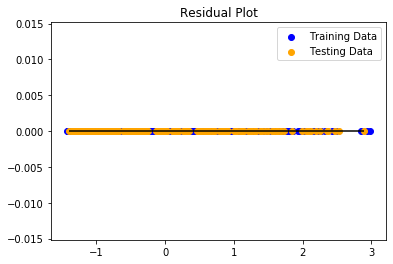

In [34]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model


predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
